In [ ]:
import numpy as np

In [28]:
data= np.genfromtxt('data/advertising.csv', delimiter= ',', skip_header= 1)

In [ ]:
X= data[:, :3]
y= data[:, 3]

In [ ]:
X_T= X.T

In [ ]:
n_features, n_samples= X_T.shape

In [ ]:
X_b = np.vstack([np.ones((1, n_samples)), X_T])
X_b.shape


In [ ]:
# theta = np.linalg.inv(X_b @ X_b.T) @ X_b @ y
# theta

In [ ]:
theta = np.random.randn(n_features + 1)
theta =theta.reshape(-1, 1)
print(theta.shape)

In [ ]:
predict= theta.T @ X_b
predict.shape

In [ ]:
y= y.reshape(-1, 1)

In [ ]:
print(f"predict: {predict.shape}, y: {y.shape}")

In [ ]:
loss_test = 1/len(y) * np.sum(np.abs(y - predict.T))

In [ ]:
loss_test

In [ ]:
epsilons = 1e-10
k = (y - predict.T) / (np.abs(y - predict.T) + epsilons)
print(f"k: {k.shape}, x: {X_b.shape}")
k_transpose = k.T
print(f"k_transpose: {k_transpose.shape}")
k_stack = np.vstack([k_transpose,k_transpose,k_transpose,k_transpose])
print(f"k_stack: {k_stack.shape}")
d_theta = np.multiply(k_stack, X_b)
print(f"d_theta: {d_theta.shape}")


In [ ]:
update = np.dot(d_theta, np.ones((n_samples, 1))) / n_samples
update

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('data/advertising.csv', delimiter=',', skip_header=1)
n_epochs = 65
losses = []
lr = 0.0006

X = data[:, :3]
y = data[:, 3].reshape(-1, 1)
X_T = X.T
n_features, n_samples = X_T.shape

theta = np.random.randn(n_features + 1).reshape(-1, 1)
X_b = np.vstack([np.ones((1, n_samples)), X_T])
print(f"X_b: {X_b.shape}, y: {y.shape}, theta: {theta.shape}")

for epoch in range(n_epochs):
    # === forward ===
    y_hat = theta.T @ X_b              # (1,n)
    error = y - y_hat.T                # (n,1)
    loss = np.sum(np.abs(error)) / len(y)

    #debug
    print(f"loss: {loss}")
    losses.append(loss)

    # === manual gradien===
    eps = 1e-10
    k = error / (np.abs(error) + eps)  # (n,1)

    # transpose để thành (1,n) cho từng mẫu
    k_T = k.T                          # (1,n)


    # tạo "bản sao" 4 hàng cho 4 tham số (bias + 3 feature)
    k_stack = -np.vstack([k_T, k_T, k_T, k_T])  # (4,n)

    # nhân từng phần tử giữa (4,n) và X_b (4,n)
    d_theta = np.multiply(k_stack, X_b)       # (4,n)

    # cộng tất cả các sample lại và chia trung bình
    update = np.dot(d_theta, np.ones((n_samples, 1))) / n_samples  # (4,1)

    # cập nhật tham số
    theta = theta - lr * update


X_b: (4, 200), y: (200, 1), theta: (4, 1)
loss: 152.64186965579927
loss: 138.78351520485782
loss: 124.92516075391721
loss: 111.06680630297758
loss: 97.20845185203923
loss: 83.3500974011025
loss: 69.49174295016795
loss: 55.63338849923646
loss: 41.7750340483097
loss: 27.91667959739131
loss: 14.496379219866192
loss: 10.911704279562638
loss: 10.524644052655262
loss: 10.25626837171442
loss: 9.973646433344712
loss: 9.707946917627005
loss: 9.451317424925508
loss: 9.18688659777904
loss: 8.922785785091664
loss: 8.663077314076883
loss: 8.401947233222275
loss: 8.144496903772382
loss: 7.889555884183312
loss: 7.63693058923598
loss: 7.3856761373365245
loss: 7.141770725329601
loss: 6.892867772435684
loss: 6.649166370993793
loss: 6.405355892678258
loss: 6.179624088819094
loss: 5.947017202152001
loss: 5.7185256645709845
loss: 5.503087235600134
loss: 5.311434932631504
loss: 5.158505072060609
loss: 5.246885524448911
loss: 6.541246514450052
loss: 6.595053993181234
loss: 8.471843641301826
loss: 5.164173880

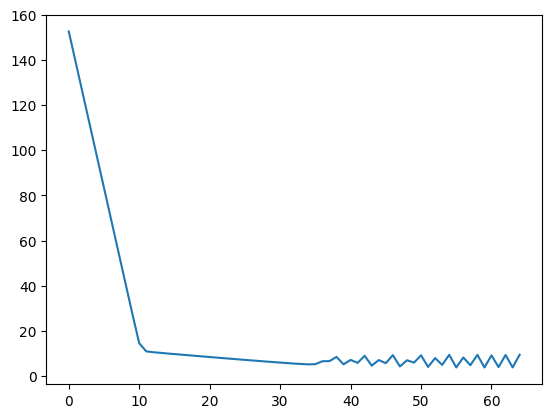

In [27]:
plt.plot(losses)